In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
Dataset = pd.read_csv("C:\\Users\\anima\\Downloads\\valuedseed classification models(1)\\valuedseed classification models\\Logistic Regression\\Python\\Social_Network_Ads.csv")
Dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
Dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
x = Dataset.iloc[:, :-1].values
y = Dataset.iloc[:, -1].values

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset = sc.fit_transform(Dataset)

## Splitting the dataset into the Training set and Test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 30)

## Feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [8]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

### Predicting new result

In [9]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


### Predicting the test set result

In [10]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]]


In [11]:
pred_df = pd.DataFrame([y_pred, y_test]).T
pred_df.rename(columns = {0: 'y_pred', 1: 'y_test'}, inplace = True)
comment = []
for p,t in zip(pred_df['y_pred'], pred_df['y_test']):
    if int(p) == int(t):
        comment.append('Rightly Predicted')
    else:
        comment.append('Wrongly Predicted')
pred_df['comment'] = comment
pred_df

,y_pred,y_test,comment
0,0,0,Rightly Predicted
1,1,1,Rightly Predicted
2,0,0,Rightly Predicted
3,0,0,Rightly Predicted
4,0,1,Wrongly Predicted
...,...,...,...
75,0,0,Rightly Predicted
76,1,1,Rightly Predicted
77,0,0,Rightly Predicted
78,1,1,Rightly Predicted


In [12]:
model_accuracy = '{:.2%}'.format(len(pred_df[pred_df['comment'] == 'Rightly Predicted'])/len(pred_df))
print('Model Accuracy: ', model_accuracy)

Model Accuracy:  86.25%


### Making the Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[49  0]
 [11 20]]


0.8625

### Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


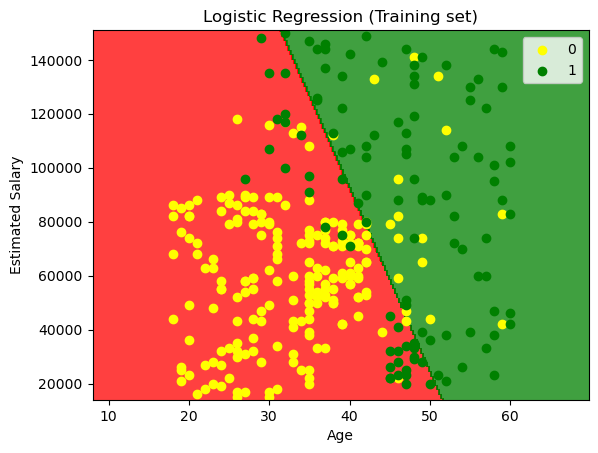

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()